In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=n

In [2]:
# Load the train dataset
df=pd.read_csv('supply_train.csv')
df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [4]:
# Droping column 'Unnamed:0' from both train and test dataset
data=df.drop('Unnamed: 0',axis=1)
data

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [5]:
# Statistical summary of numerical features
numerical_summary = data.describe()
numerical_summary

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [6]:
# deleting duplicate rows
data.duplicated().sum()

0

In [7]:
data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [8]:
# Null values in train dataset
data.isna().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [9]:
# No of unique values in each columns
data.nunique()

Ware_house_ID                   16620
WH_Manager_ID                   16620
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
num_refill_req_l3m                  9
transport_issue_l1y                 6
Competitor_in_mkt                  12
retail_shop_num                  4356
wh_owner_type                       2
distributor_num                    56
flood_impacted                      2
flood_proof                         2
electric_supply                     2
dist_from_hub                     217
workers_num                        60
wh_est_year                        28
storage_issue_reported_l3m         37
temp_reg_mach                       2
approved_wh_govt_certificate        5
wh_breakdown_l3m                    7
govt_check_l3m                     32
product_wg_ton                   4248
dtype: int64

In [10]:
data.workers_num.median()

28.0

In [11]:
data['workers_num'].fillna(data.workers_num.median(),inplace=True)

In [12]:
# Meadian and mode of wherehouse establishment year in training dataset
data.wh_est_year.median(),data.wh_est_year.mode()[0]

(2009.0, 2000.0)

In [13]:
data['wh_est_year'].fillna(data.wh_est_year.mode()[0],inplace=True)

In [14]:
data

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2000.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2000.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,2000.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,2000.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,1,164,30.0,2000.0,17,0,B+,6,24,21113
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,...,1,119,28.0,2007.0,16,0,A,5,15,21103


In [15]:
numerical_cols= data.select_dtypes(include=['int64','float64']).columns
numerical_cols

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


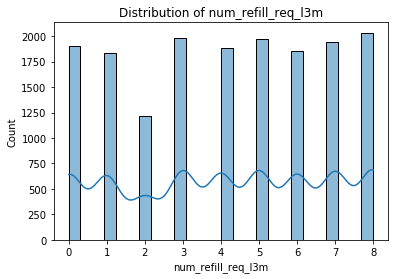

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


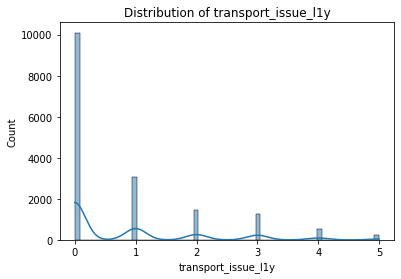

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


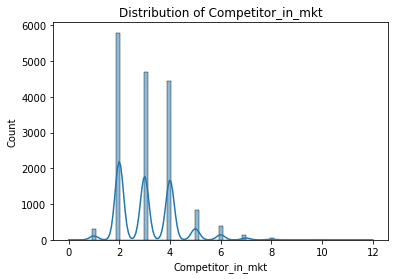

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


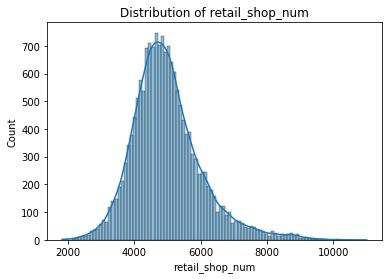

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


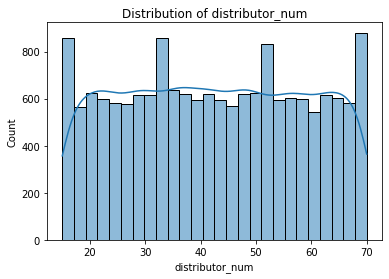

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


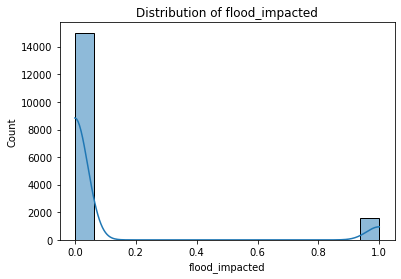

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


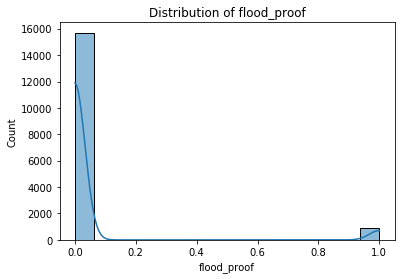

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


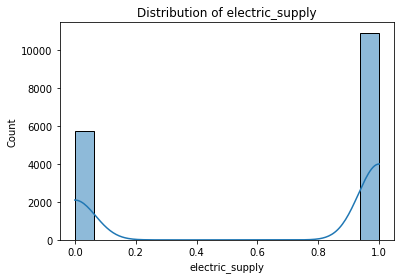

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


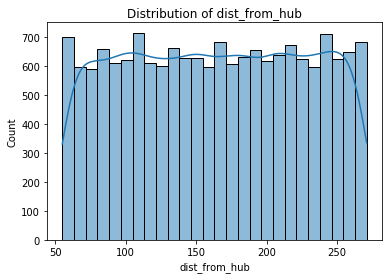

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


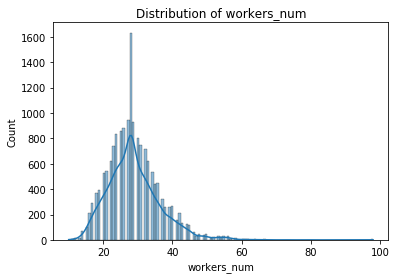

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


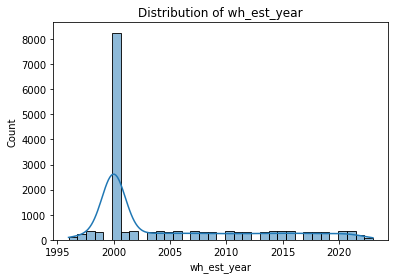

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


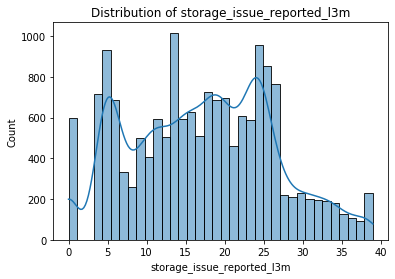

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


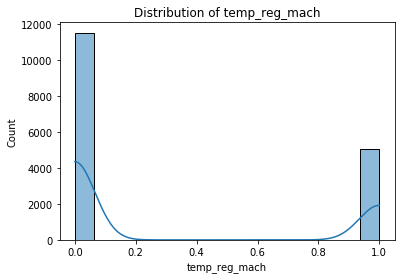

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


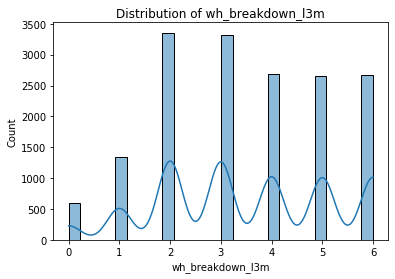

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


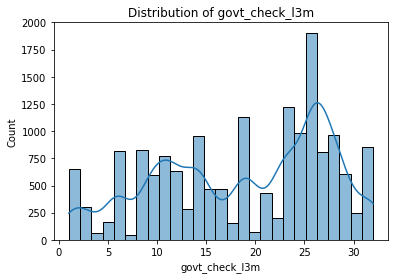

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


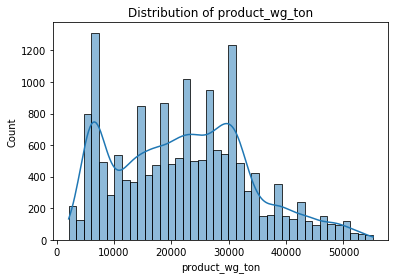

In [16]:
# Distribution of numerical features using histograms
for  column in data[numerical_cols]:
    sns.histplot(data, x=column, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

### Outlayer detection and removel  of train dataset

Text(0.5, 0, 'Product weight')

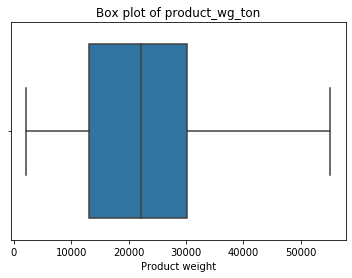

In [17]:
# Box plot of product_wg_ton

plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='product_wg_ton')
plt.title('Box plot of product_wg_ton')
plt.xlabel('Product weight')

In [18]:
# No outlayers Found for 'product_wg_ton'

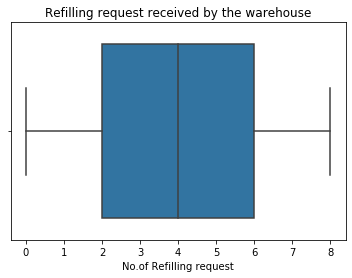

In [19]:
# Box plot for Refilling request received by the warehouse

plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='num_refill_req_l3m')
plt.title('Refilling request received by the warehouse')
plt.xlabel('No.of Refilling request')
plt.show()

In [20]:
# No outlayers Found for 'num_refill_req_l3m'

Text(0.5, 0, 'No.of transport issued')

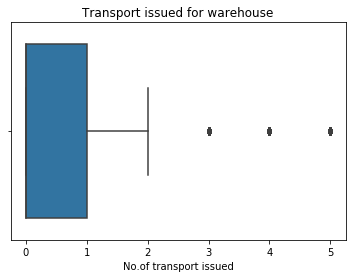

In [21]:
# Box plot of Transport issued for warehouse

plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='transport_issue_l1y')
plt.title('Transport issued for warehouse')
plt.xlabel('No.of transport issued')

In [22]:
# outlayer exist for the column 'transport_issue_l1y'

Text(0.5, 0, 'No.of transport issued')

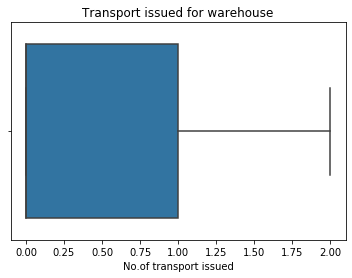

In [23]:
# Interquatile method is used to remove the outlayer

q1=data.transport_issue_l1y.quantile(0.25)
q3=data.transport_issue_l1y.quantile(0.75)
iqr=q3-q1
min=q1-1.5*iqr
max=q3+1.5*iqr
df1=data[(data.transport_issue_l1y>min)&(data.transport_issue_l1y<max)]
plt.figure(figsize=(6,4))
sns.boxplot(data=df1,x='transport_issue_l1y')
plt.title('Transport issued for warehouse')
plt.xlabel('No.of transport issued')

In [24]:
# outlayer removed for 'transport_issue_l1y'

Text(0.5, 0, 'No. of competitors in the market')

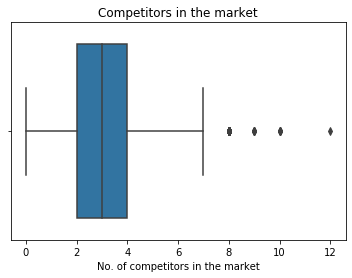

In [25]:
# Box plot for 'Competitors in the market'

plt.figure(figsize=(6,4))
sns.boxplot(data=data,x ='Competitor_in_mkt')
plt.title('Competitors in the market')
plt.xlabel('No. of competitors in the market')

In [26]:
# Outlayers exist for number of competitors in the market

Text(0.5, 0, 'No. of competitors in the market')

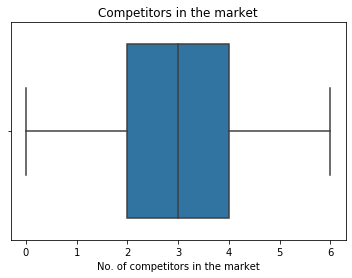

In [27]:
# Normal distribution method is used to remove the outlayer

m=data.Competitor_in_mkt.mean()
s=data.Competitor_in_mkt.std()
min=m-3*s
max=m+3*s
df1=data[(data.Competitor_in_mkt>min)&(data.Competitor_in_mkt<max)]
plt.figure(figsize=(6,4))
sns.boxplot(data=df1,x ='Competitor_in_mkt')
plt.title('Competitors in the market')
plt.xlabel('No. of competitors in the market')

In [28]:
# Outlayer removed from 'Competitor_in_mkt'

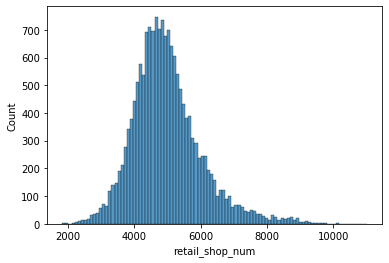

In [29]:
# Histogram plot of 'retail_shop_num'

plt.figure(figsize=(6,4))
sns.histplot(data=data,x='retail_shop_num')

In [30]:
# Outlayers exist for 'retail_shop_num'

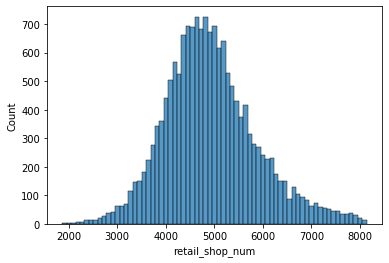

In [31]:
# Normal distribution method is used to remove the outlayer

m=data.retail_shop_num.mean()
s=data.retail_shop_num.std()
min=m-3*s
max=m+3*s
df1=data[(data.retail_shop_num>min)&(data.retail_shop_num<max)]
plt.figure(figsize=(6,4))
sns.histplot(data=df1,x='retail_shop_num')

In [32]:
# Outlayer removed from 'retail_shop_num'

Text(0.5, 1.0, 'The number of workers in the warehouse')

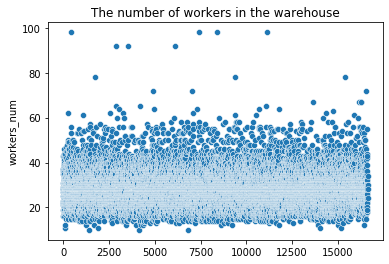

In [33]:
# Scatterplot for 'workers_num'

plt.figure(figsize=(6,4))
sns.scatterplot(data=data['workers_num'])
plt.title('The number of workers in the warehouse')

In [34]:
# Outlayer exist in 'workers_num'

Text(0.5, 1.0, 'The number of workers in the warehouse')

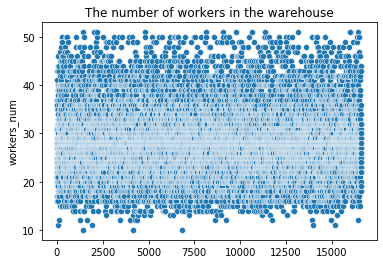

In [35]:
# zscore method is used to remove the outlayer

data['zscore']=(data.workers_num-data.workers_num.mean())/data.workers_num.std()
df1=data[(data.zscore>-3)&(data.zscore<3)]
plt.figure(figsize=(6,4))
sns.scatterplot(data=df1['workers_num'])
plt.title('The number of workers in the warehouse')


In [36]:
data.drop(columns=['zscore'],inplace=True)

In [37]:
# Outlayers removed from 'workers_num'

Text(0.5, 1.0, 'warehouse establishment year')

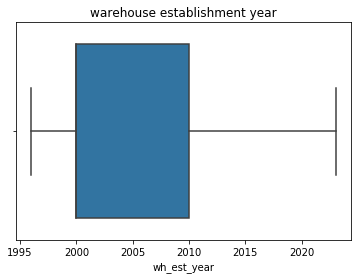

In [38]:
# Box plot for 'wh_est_year'

plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='wh_est_year')
plt.title('warehouse establishment year')

In [39]:
# No outlayer exist for 'wh_est_year'

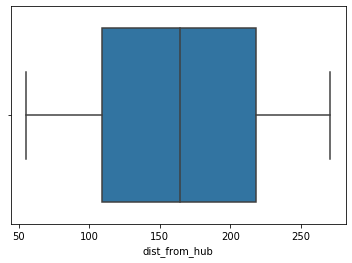

In [40]:
# box plot of 'dist_from_hub'

plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='dist_from_hub')

In [41]:
# No outlayer exist for 'dist_from_hub'

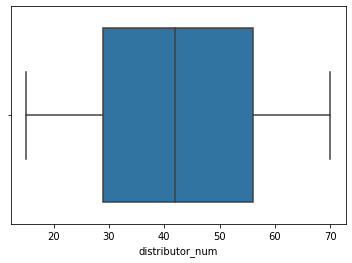

In [42]:
# Box plot of 'distributor_num'

plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='distributor_num')

In [43]:
# No outlayer for'distributor_num'

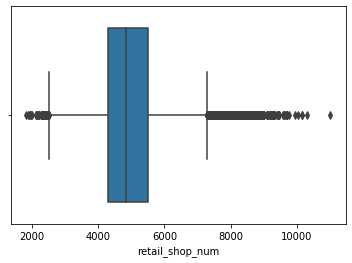

In [44]:
# box plot of 'retail_shop_num'

plt.figure(figsize=(6,4))
sns.boxplot(data=data,x='retail_shop_num')

In [45]:
# Outlayers exist for 'retail_shop_num'

In [46]:
# percentile method is used to remove the outlayers

data.retail_shop_num.quantile(0.1)

3826.0

In [47]:
data.retail_shop_num.quantile(0.95)

6914.049999999999

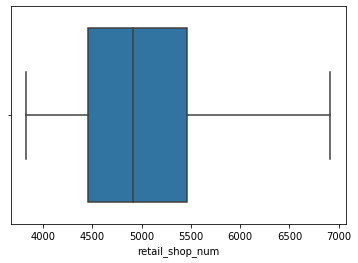

In [48]:
df1=data[(data.retail_shop_num.quantile(0.1)<data.retail_shop_num)&(data.retail_shop_num.quantile(0.95)>data.retail_shop_num)]
plt.figure(figsize=(6,4))
sns.boxplot(data=df1,x='retail_shop_num')

In [49]:
# Outlayers removed from 'retail_shop_num'

In [50]:
# Train dataset after removing the outlayers
data=df1
data

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2000.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2000.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,2000.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,2000.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16614,WH_116614,EID_66614,Urban,Mid,West,Zone 4,3,0,4,5377,...,0,78,28.0,2009.0,16,0,A,3,26,21069
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,1,164,30.0,2000.0,17,0,B+,6,24,21113
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,1,211,24.0,2003.0,24,1,B,5,29,28117


In [51]:
# Addition of New relevant features
data['transport_issue_l3m_equivalent'] = data['transport_issue_l1y'] / 4
demand = data['num_refill_req_l3m']
supply = data['transport_issue_l3m_equivalent']
data['Demand_Supply_Gap'] = demand - supply
data

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,29.0,2000.0,13,0,A,5,15,17115,0.25,2.75
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,31.0,2000.0,4,0,A,3,17,5074,0.00,0.00
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,37.0,2000.0,17,0,A,6,22,23137,0.00,1.00
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,21.0,2000.0,17,1,A+,3,27,22115,1.00,6.00
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,25.0,2009.0,18,0,C,6,24,24071,0.25,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16614,WH_116614,EID_66614,Urban,Mid,West,Zone 4,3,0,4,5377,...,28.0,2009.0,16,0,A,3,26,21069,0.00,3.00
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,19.0,2009.0,14,0,B+,5,23,16094,0.25,2.75
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,30.0,2000.0,17,0,B+,6,24,21113,0.00,2.00
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,24.0,2003.0,24,1,B,5,29,28117,0.00,5.00


In [52]:
data.isna().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                         0
wh_est_year                         0
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      515
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
transport_issue_l3m_equivalent      0
Demand_Supply_Gap                   0
dtype: int64

#### Predicting the missing 'approved_wh_govt_certificate ' values

In [53]:
# Split data into known and missing 'approved_wh_govt_certificate' values
known_data = data[data['approved_wh_govt_certificate'].notnull()]
missing_data = data[data['approved_wh_govt_certificate'].isnull()]

In [54]:
categorical_cols = known_data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [55]:
# Label Encoding the categorical columns of Known data
le = preprocessing.LabelEncoder()
encoded_known_data= known_data
encoded_known_data['Ware_house_ID'] = le.fit_transform(known_data['Ware_house_ID'])
encoded_known_data['WH_Manager_ID'] = le.fit_transform(known_data['WH_Manager_ID'])
encoded_known_data['Location_type'] = le.fit_transform(known_data['Location_type'])
encoded_known_data['WH_capacity_size'] = le.fit_transform(known_data['WH_capacity_size'])
encoded_known_data['zone'] = le.fit_transform(known_data['zone'])
encoded_known_data['WH_regional_zone'] = le.fit_transform(known_data['WH_regional_zone'])
encoded_known_data['wh_owner_type'] = le.fit_transform(known_data['wh_owner_type'])
encoded_known_data['approved_wh_govt_certificate']= le.fit_transform(known_data['approved_wh_govt_certificate'])
encoded_known_data

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
0,0,0,1,2,3,5,3,1,2,4651,...,29.0,2000.0,13,0,0,5,15,17115,0.25,2.75
1,1,1,0,0,1,4,0,0,4,6217,...,31.0,2000.0,4,0,0,3,17,5074,0.00,0.00
2,2,2,0,1,2,1,1,0,4,4306,...,37.0,2000.0,17,0,0,6,22,23137,0.00,1.00
3,3,3,0,1,1,2,7,4,2,6000,...,21.0,2000.0,17,1,1,3,27,22115,1.00,6.00
4,4,4,0,0,1,4,3,1,2,4740,...,25.0,2009.0,18,0,4,6,24,24071,0.25,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16614,13605,13605,1,1,3,3,3,0,4,5377,...,28.0,2009.0,16,0,0,3,26,21069,0.00,3.00
16615,13606,13606,1,0,3,5,3,1,6,4779,...,19.0,2009.0,14,0,3,5,23,16094,0.25,2.75
16616,13607,13607,1,0,1,4,2,0,2,5718,...,30.0,2000.0,17,0,3,6,24,21113,0.00,2.00
16617,13608,13608,0,0,1,5,5,0,4,4514,...,24.0,2003.0,24,1,2,5,29,28117,0.00,5.00


In [56]:
missing_features = missing_data.drop(columns=['approved_wh_govt_certificate'])
missing_features

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
35,WH_100035,EID_50035,Rural,Large,North,Zone 5,0,1,4,5353,...,80,30.0,2000.0,0,0,0,24,4141,0.25,-0.25
99,WH_100099,EID_50099,Rural,Mid,North,Zone 4,3,0,3,4477,...,173,27.0,2021.0,0,0,0,26,14130,0.00,3.00
117,WH_100117,EID_50117,Rural,Mid,South,Zone 2,5,0,3,4204,...,248,18.0,2023.0,0,0,0,32,6106,0.00,5.00
188,WH_100188,EID_50188,Rural,Mid,West,Zone 4,6,2,4,4862,...,149,29.0,2000.0,0,0,0,11,3142,0.50,5.50
192,WH_100192,EID_50192,Rural,Mid,West,Zone 2,3,0,5,4637,...,170,18.0,2022.0,0,0,0,1,13142,0.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16389,WH_116389,EID_66389,Rural,Large,North,Zone 5,3,1,2,5633,...,128,37.0,2023.0,0,0,0,24,6072,0.25,2.75
16431,WH_116431,EID_66431,Rural,Large,West,Zone 5,0,0,3,4484,...,58,22.0,2000.0,0,0,0,25,3085,0.00,0.00
16454,WH_116454,EID_66454,Rural,Mid,West,Zone 2,1,0,5,4178,...,268,25.0,2000.0,0,0,0,1,4081,0.00,1.00
16516,WH_116516,EID_66516,Rural,Mid,South,Zone 4,2,1,2,4738,...,106,17.0,2000.0,0,0,0,11,5135,0.25,1.75


In [57]:
encoded_missing_features = missing_features
encoded_missing_features['Ware_house_ID'] = le.fit_transform(missing_features['Ware_house_ID'])
encoded_missing_features['WH_Manager_ID'] = le.fit_transform(missing_features['WH_Manager_ID'])
encoded_missing_features['Location_type'] = le.fit_transform(missing_features['Location_type'])
encoded_missing_features['WH_capacity_size'] = le.fit_transform(missing_features['WH_capacity_size'])
encoded_missing_features['zone'] = le.fit_transform(missing_features['zone'])
encoded_missing_features['WH_regional_zone'] = le.fit_transform(missing_features['WH_regional_zone'])
encoded_missing_features['wh_owner_type'] = le.fit_transform(missing_features['wh_owner_type'])
encoded_missing_features

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
35,0,0,0,0,1,4,0,1,4,5353,...,80,30.0,2000.0,0,0,0,24,4141,0.25,-0.25
99,1,1,0,1,1,3,3,0,3,4477,...,173,27.0,2021.0,0,0,0,26,14130,0.00,3.00
117,2,2,0,1,2,1,5,0,3,4204,...,248,18.0,2023.0,0,0,0,32,6106,0.00,5.00
188,3,3,0,1,3,3,6,2,4,4862,...,149,29.0,2000.0,0,0,0,11,3142,0.50,5.50
192,4,4,0,1,3,1,3,0,5,4637,...,170,18.0,2022.0,0,0,0,1,13142,0.00,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16389,510,510,0,0,1,4,3,1,2,5633,...,128,37.0,2023.0,0,0,0,24,6072,0.25,2.75
16431,511,511,0,0,3,4,0,0,3,4484,...,58,22.0,2000.0,0,0,0,25,3085,0.00,0.00
16454,512,512,0,1,3,1,1,0,5,4178,...,268,25.0,2000.0,0,0,0,1,4081,0.00,1.00
16516,513,513,0,1,2,3,2,1,2,4738,...,106,17.0,2000.0,0,0,0,11,5135,0.25,1.75


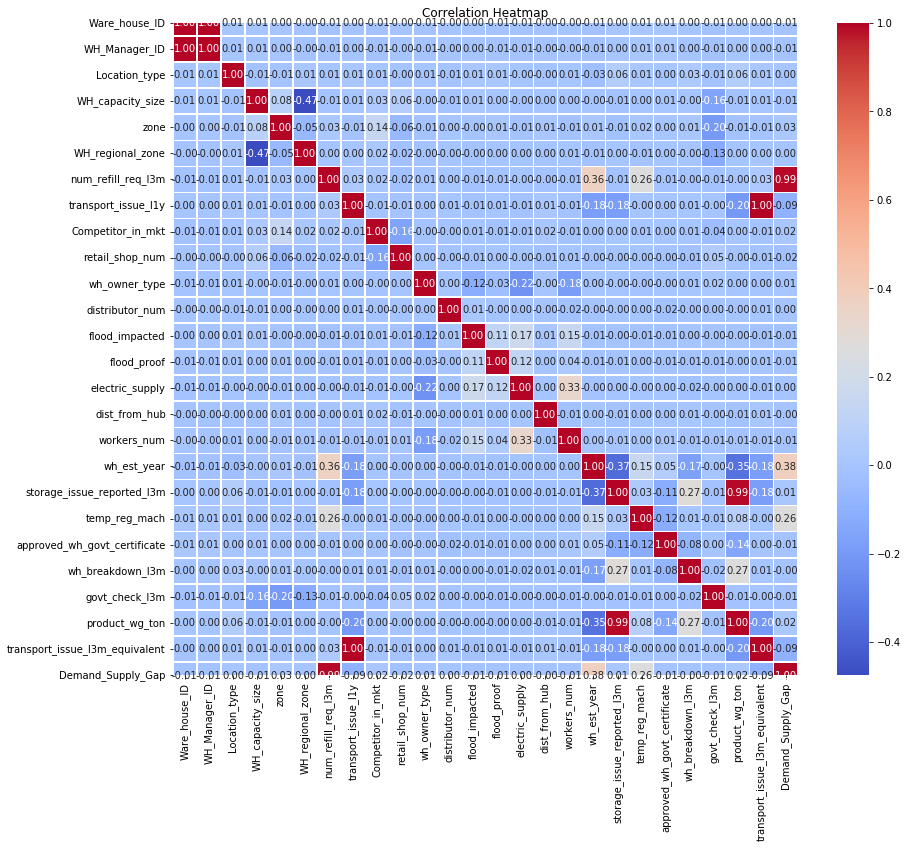

In [58]:
# plot a heatmap to show the correlation among variables.
correlation_matrix = encoded_known_data.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### The independent variables that affects 'approved_wh_govt_certificate' are,
wh_est_year , storage_issue_reported_l3m , temp_reg_mach , wh_breakdon_13m , product_wg_ton

In [59]:
# Split the known data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(encoded_known_data[['wh_est_year','storage_issue_reported_l3m','temp_reg_mach','wh_breakdown_l3m','product_wg_ton']], encoded_known_data['approved_wh_govt_certificate'] , test_size=0.2, random_state=42)

In [60]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current us

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [61]:
# Predicted  missing values for 'approved_wh_govt_certificate'

predicted_values = classifier.predict(encoded_missing_features[['wh_est_year','storage_issue_reported_l3m','temp_reg_mach','wh_breakdown_l3m','product_wg_ton']])
predicted_values

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array([3, 4, 4, 3, 4, 4, 4, 4, 2, 4, 2, 3, 3, 3, 4, 4, 2, 2, 4, 4, 4, 3,
       3, 4, 3, 3, 4, 4, 2, 4, 4, 3, 4, 2, 4, 3, 4, 3, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 4,
       4, 4, 4, 4, 2, 4, 3, 4, 3, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4,
       4, 3, 4, 4, 4, 4, 2, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4, 4, 3, 2, 2,
       3, 3, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 3,
       3, 4, 4, 3, 4, 4, 4, 3, 0, 4, 2, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4,
       4, 4, 3, 4, 4, 4, 3, 4, 0, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4,
       3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 0, 3, 0, 4, 3, 3, 3, 3, 4, 0, 3,
       3, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 4, 2, 3, 3,
       3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 3, 4, 2, 3, 3, 3, 4, 4, 4,
       3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 0, 4, 4, 4, 4, 3, 2, 3,
       3, 4, 2, 3, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 3, 3, 4, 3, 0, 3, 4, 4,
       3, 4, 4, 3, 4, 3, 3, 4, 0, 4, 4, 3, 2, 4, 3,

In [62]:
encoded_missing_features['approved_wh_govt_certificate'] = predicted_values
encoded_missing_features

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap,approved_wh_govt_certificate
35,0,0,0,0,1,4,0,1,4,5353,...,30.0,2000.0,0,0,0,24,4141,0.25,-0.25,3
99,1,1,0,1,1,3,3,0,3,4477,...,27.0,2021.0,0,0,0,26,14130,0.00,3.00,4
117,2,2,0,1,2,1,5,0,3,4204,...,18.0,2023.0,0,0,0,32,6106,0.00,5.00,4
188,3,3,0,1,3,3,6,2,4,4862,...,29.0,2000.0,0,0,0,11,3142,0.50,5.50,3
192,4,4,0,1,3,1,3,0,5,4637,...,18.0,2022.0,0,0,0,1,13142,0.00,3.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16389,510,510,0,0,1,4,3,1,2,5633,...,37.0,2023.0,0,0,0,24,6072,0.25,2.75,4
16431,511,511,0,0,3,4,0,0,3,4484,...,22.0,2000.0,0,0,0,25,3085,0.00,0.00,3
16454,512,512,0,1,3,1,1,0,5,4178,...,25.0,2000.0,0,0,0,1,4081,0.00,1.00,3
16516,513,513,0,1,2,3,2,1,2,4738,...,17.0,2000.0,0,0,0,11,5135,0.25,1.75,3


In [63]:
data_encoded = pd.concat([encoded_known_data, encoded_missing_features])
data_encoded

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
0,0,0,1,2,3,5,3,1,2,4651,...,29.0,2000.0,13,0,0,5,15,17115,0.25,2.75
1,1,1,0,0,1,4,0,0,4,6217,...,31.0,2000.0,4,0,0,3,17,5074,0.00,0.00
2,2,2,0,1,2,1,1,0,4,4306,...,37.0,2000.0,17,0,0,6,22,23137,0.00,1.00
3,3,3,0,1,1,2,7,4,2,6000,...,21.0,2000.0,17,1,1,3,27,22115,1.00,6.00
4,4,4,0,0,1,4,3,1,2,4740,...,25.0,2009.0,18,0,4,6,24,24071,0.25,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16389,510,510,0,0,1,4,3,1,2,5633,...,37.0,2023.0,0,0,4,0,24,6072,0.25,2.75
16431,511,511,0,0,3,4,0,0,3,4484,...,22.0,2000.0,0,0,3,0,25,3085,0.00,0.00
16454,512,512,0,1,3,1,1,0,5,4178,...,25.0,2000.0,0,0,3,0,1,4081,0.00,1.00
16516,513,513,0,1,2,3,2,1,2,4738,...,17.0,2000.0,0,0,3,0,11,5135,0.25,1.75


In [64]:
# All missing values are removed
data_encoded.isna().sum()

Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
wh_est_year                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate      0
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
transport_issue_l3m_equivalent    0
Demand_Supply_Gap                 0
dtype: int64

In [65]:
# All categorical values are encoded
data_encoded.dtypes

Ware_house_ID                       int32
WH_Manager_ID                       int32
Location_type                       int32
WH_capacity_size                    int32
zone                                int32
WH_regional_zone                    int32
num_refill_req_l3m                  int64
transport_issue_l1y                 int64
Competitor_in_mkt                   int64
retail_shop_num                     int64
wh_owner_type                       int32
distributor_num                     int64
flood_impacted                      int64
flood_proof                         int64
electric_supply                     int64
dist_from_hub                       int64
workers_num                       float64
wh_est_year                       float64
storage_issue_reported_l3m          int64
temp_reg_mach                       int64
approved_wh_govt_certificate        int32
wh_breakdown_l3m                    int64
govt_check_l3m                      int64
product_wg_ton                    

In [66]:
# neumericals columns of 'data'
numerical_cols=data.select_dtypes(include=['int64','float64']).columns
numerical_cols

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'transport_issue_l3m_equivalent',
       'Demand_Supply_Gap'],
      dtype='object')

In [67]:
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [68]:
data_encoded.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
0,0,0,1,2,3,5,-0.434430,0.177471,-0.953559,-0.495908,...,0.015001,-0.684051,-0.444230,-0.666650,0,0.900326,-0.438343,-0.423136,0.177471,-0.453256
1,1,1,0,0,1,4,-1.583914,-0.648487,0.816817,1.708329,...,0.275143,-0.684051,-1.423131,-0.666650,0,-0.284148,-0.206522,-1.455717,-0.648487,-1.502883
2,2,2,0,1,2,1,-1.200753,-0.648487,0.816817,-0.981516,...,1.055570,-0.684051,-0.009163,-0.666650,0,1.492563,0.373031,0.093283,-0.648487,-1.121201
3,3,3,0,1,1,2,1.098215,2.655345,-0.953559,1.402889,...,-1.025568,-0.684051,-0.009163,1.500038,1,-0.284148,0.952584,0.005641,2.655345,0.787212
4,4,4,0,0,1,4,-0.434430,0.177471,-0.953559,-0.370636,...,-0.505284,0.564531,0.099603,-0.666650,4,1.492563,0.604852,0.173379,0.177471,-0.453256


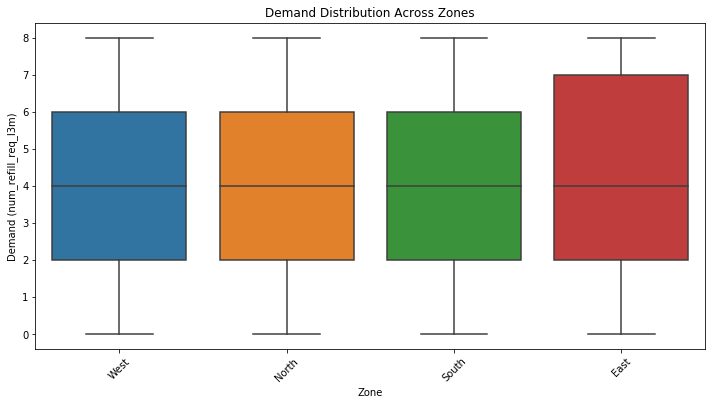

In [69]:
# Demand and supply across different zones
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='zone', y='num_refill_req_l3m')
plt.title("Demand Distribution Across Zones")
plt.xlabel("Zone")
plt.ylabel("Demand (num_refill_req_l3m)")
plt.xticks(rotation=45)
plt.show()

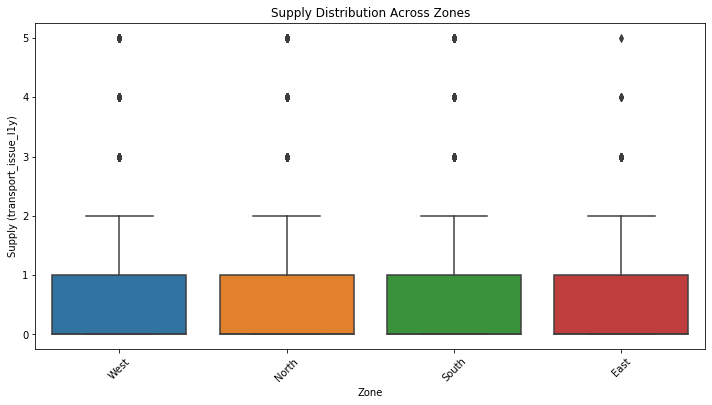

In [70]:

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='zone', y='transport_issue_l1y')
plt.title("Supply Distribution Across Zones")
plt.xlabel("Zone")
plt.ylabel("Supply (transport_issue_l1y)")
plt.xticks(rotation=45)
plt.show()
 


In [114]:
#checking preprocessed test data and preprocessed train data have same columns
data_test=pd.read_csv('supply_test_preprocessed.csv')
data_encoded.columns.equals(data_test.columns)

True

In [115]:
data_test

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
0,0,0,0,0,1,4,0.376796,-0.638786,-0.068450,0.817139,...,0.14199,-0.330009,0.747568,-0.653758,0,-0.869041,-1.602937,0.691709,-0.638786,0.447891
1,1,1,0,0,1,4,0.376796,-0.638786,-0.987442,1.189886,...,0.27233,1.969177,-1.321103,1.529618,4,-0.869041,0.573669,-1.381360,-0.638786,0.447891
2,2,2,0,2,1,5,-0.394020,-0.638786,-0.068450,-0.285687,...,1.57573,0.023712,0.203181,1.529618,1,0.893420,-1.144704,0.169844,-0.638786,-0.318408
3,3,3,0,1,3,3,0.376796,1.030655,-0.987442,-0.312312,...,0.53301,1.615456,-0.885593,1.529618,1,-0.281554,-0.915588,-0.776683,1.030655,0.256316
4,4,4,0,2,1,0,-1.164837,-0.638786,-0.987442,0.693824,...,-0.37937,-0.330009,-0.341206,1.529618,2,-0.869041,1.375576,-0.256627,-0.638786,-1.084706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4694,169,169,0,1,3,3,1.533022,0.195935,-0.987442,-0.053071,...,0.01165,2.499759,-1.865490,-0.653758,4,-2.044015,0.802785,-1.296135,0.195935,1.501551
4695,170,170,0,1,3,3,0.762205,-0.638786,0.850542,2.002642,...,1.57573,2.499759,-1.865490,-0.653758,2,-2.044015,0.802785,-1.463139,-0.638786,0.831040
4696,171,171,0,1,3,3,0.376796,-0.638786,1.769534,2.016655,...,-0.64005,2.322898,-1.865490,-0.653758,4,-2.044015,0.802785,-0.778234,-0.638786,0.447891
4697,172,172,0,0,2,5,-1.164837,-0.638786,-0.068450,-0.358555,...,-0.77039,-0.330009,-1.865490,1.529618,4,-2.044015,1.146460,-1.378086,-0.638786,-1.084706


###   Feature Selection

In [72]:
 data_encoded

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,transport_issue_l3m_equivalent,Demand_Supply_Gap
0,0,0,1,2,3,5,-0.434430,0.177471,-0.953559,-0.495908,...,0.015001,-0.684051,-0.444230,-0.666650,0,0.900326,-0.438343,-0.423136,0.177471,-0.453256
1,1,1,0,0,1,4,-1.583914,-0.648487,0.816817,1.708329,...,0.275143,-0.684051,-1.423131,-0.666650,0,-0.284148,-0.206522,-1.455717,-0.648487,-1.502883
2,2,2,0,1,2,1,-1.200753,-0.648487,0.816817,-0.981516,...,1.055570,-0.684051,-0.009163,-0.666650,0,1.492563,0.373031,0.093283,-0.648487,-1.121201
3,3,3,0,1,1,2,1.098215,2.655345,-0.953559,1.402889,...,-1.025568,-0.684051,-0.009163,1.500038,1,-0.284148,0.952584,0.005641,2.655345,0.787212
4,4,4,0,0,1,4,-0.434430,0.177471,-0.953559,-0.370636,...,-0.505284,0.564531,0.099603,-0.666650,4,1.492563,0.604852,0.173379,0.177471,-0.453256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16389,510,510,0,0,1,4,-0.434430,0.177471,-0.953559,0.886315,...,1.055570,2.506769,-1.858198,-0.666650,4,-2.060859,0.604852,-1.370133,0.177471,-0.453256
16431,511,511,0,0,3,4,-1.583914,-0.648487,-0.068371,-0.730971,...,-0.895497,-0.684051,-1.858198,-0.666650,3,-2.060859,0.720763,-1.626285,-0.648487,-1.502883
16454,512,512,0,1,3,1,-1.200753,-0.648487,1.702006,-1.161684,...,-0.505284,-0.684051,-1.858198,-0.666650,3,-2.060859,-2.061091,-1.540873,-0.648487,-1.121201
16516,513,513,0,1,2,3,-0.817592,0.177471,-0.953559,-0.373451,...,-1.545853,-0.684051,-1.858198,-0.666650,3,-2.060859,-0.901985,-1.450486,0.177471,-0.834939


In [73]:
# Select relevant features for model training
# Split the data into features (X) and the target variable (y)
X = data_encoded.drop(columns=['WH_Manager_ID','num_refill_req_l3m','transport_issue_l1y'])  
y = data_encoded['num_refill_req_l3m']

In [74]:
# use feature importance from a tree-based model like Random Forest.
rf_model = RandomForestRegressor()

In [75]:
# Fit the model to the data to calculate feature importances
rf_model.fit(X, y)


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [76]:
feature_importances = rf_model.feature_importances_

In [77]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [78]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [79]:
selected_features = feature_importance_df['Feature'][:16] 

In [80]:
X_selected = X[selected_features]

In [81]:
X_selected.columns

Index(['Demand_Supply_Gap', 'transport_issue_l3m_equivalent', 'dist_from_hub',
       'product_wg_ton', 'govt_check_l3m', 'wh_breakdown_l3m',
       'approved_wh_govt_certificate', 'temp_reg_mach',
       'storage_issue_reported_l3m', 'wh_est_year', 'workers_num',
       'Ware_house_ID', 'Location_type', 'flood_proof', 'flood_impacted',
       'distributor_num'],
      dtype='object')

 ### Model Building

In [82]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [83]:
X_train=X_selected
X_test=data_test[X_selected.columns]
y_train=data_encoded['num_refill_req_l3m']
y_test=data_test['num_refill_req_l3m']

In [84]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [85]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [86]:
y_pred = model.predict(X_test)
y_pred 

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


array([ 0.33189227,  0.33189227, -0.4344303 , ...,  0.33189227,
       -1.20075287, -1.20075287])

In [87]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [88]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.04270720652073355
Mean Squared Error: 0.0018579000827007451
Root Mean Squared Error: 0.04310336509717942


In [89]:
model_metrics = {}
model_metrics['Random Forest Regression'] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

#### Lower values for MAE, MSE, and RMSE indicate better Random Forest Regression model performance because they indicate smaller errors between the predicted and actual values. 

In [90]:
#  LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
model = LinearRegression()

In [92]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
y_pred = model.predict(X_test)

In [94]:
linear_pred=y_pred 

In [95]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [96]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.0018234476635594612
Mean Squared Error: 4.623876381282427e-06
Root Mean Squared Error: 0.002150320064846726


In [97]:
model_metrics['LinearRegression'] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

#### LinearRegression model is performing  well, with very accurate and precise demand predictions. Such low error values are typically desirable in demand forecasting, as they can lead to more effective supply chain management and cost reduction.

In [98]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

In [99]:
model =DecisionTreeRegressor()

In [100]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [101]:
y_pred = model.predict(X_test)

In [102]:
 # Evaluate the model using appropriate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
   

In [103]:
 # Print the results for each model
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 0.04270720652073457
Mean Squared Error: 0.0018579000827007757
Root Mean Squared Error: 0.043103365097179776


#### Random Forest Regression and Decision Tree Regressor have similar performance, with higher error metrics compared to Linear Regression.

In [104]:
model_metrics['DecisionTreeRegressor '] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse}

In [105]:
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}\n")
    print("Mean Absolute Error (MAE):", metrics['MAE'])
    print("Mean Squared Error (MSE):", metrics['MSE'])
    print("Root Mean Squared Error (RMSE):", metrics['RMSE'],"\n\n")

Model: Random Forest Regression

Mean Absolute Error (MAE): 0.04270720652073355
Mean Squared Error (MSE): 0.0018579000827007451
Root Mean Squared Error (RMSE): 0.04310336509717942 


Model: LinearRegression

Mean Absolute Error (MAE): 0.0018234476635594612
Mean Squared Error (MSE): 4.623876381282427e-06
Root Mean Squared Error (RMSE): 0.002150320064846726 


Model: DecisionTreeRegressor 

Mean Absolute Error (MAE): 0.04270720652073457
Mean Squared Error (MSE): 0.0018579000827007757
Root Mean Squared Error (RMSE): 0.043103365097179776 




In [106]:
model_names=list(model_metrics.keys())
metric_names = list(model_metrics['Random Forest Regression'].keys())
metric_values = {metric: [metrics[metric] for metrics in model_metrics.values()] for metric in metric_names}

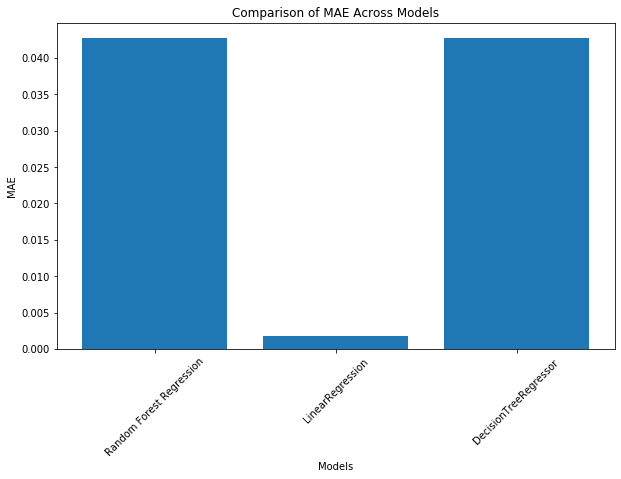

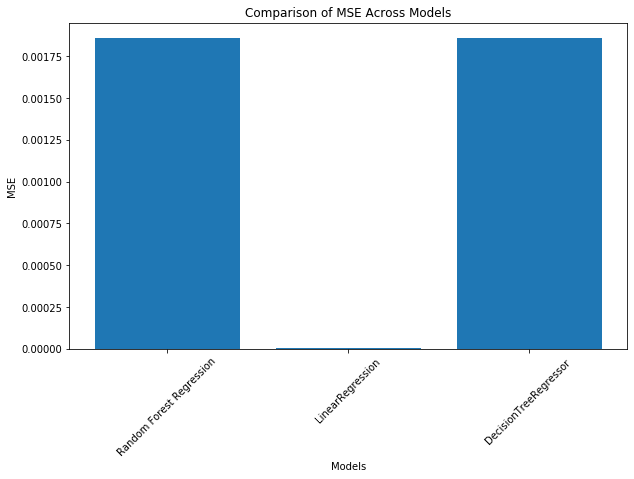

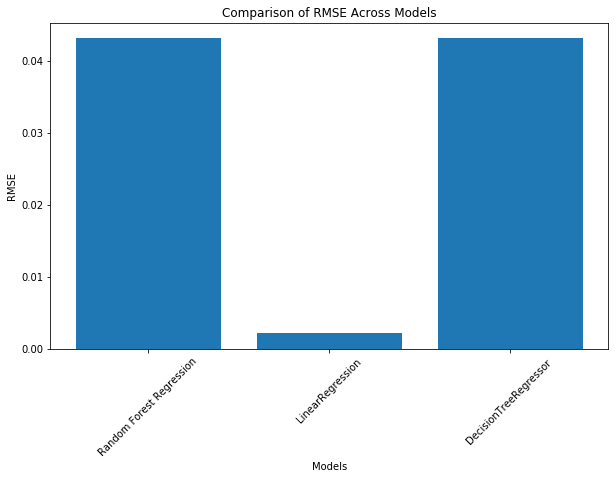

In [107]:
for metric in metric_names:
    plt.figure(figsize=(10, 6))
    plt.bar(model_names, metric_values[metric])
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} Across Models')
    plt.xticks(rotation=45)
    plt.show()

####  Linear Regression appears to be the best-performing model as it has the lowest MAE, MSE, and RMSE, indicating that it provides the most accurate predictions compared to the other two models.